# Week 2: Data Representations

## Activity: Lab Session 2

__Name__: _Your full name_

__Date__: _dd/mm/yyyy_

## Importing the right packages

In this assignment, we need the following packages. You can install the Python Imaging Library (PIL) thus:

```
(venv) $ pip install Pillow

or 

conda install pillow
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from PIL import Image, ImageDraw


## Exercise 1: Image processing

### Exercise 1A: Crop an image (<i class="fa fa-coffee"></i>)

Consider a bounding box that surrounds the orca in the `whale.jpg` (see lab datasets) image with coordinates: $x_{min} = 181$, $y_{min} = 133$, $x_{max} = 241$, and $y_{max} = 193$.

Let's visualise it.

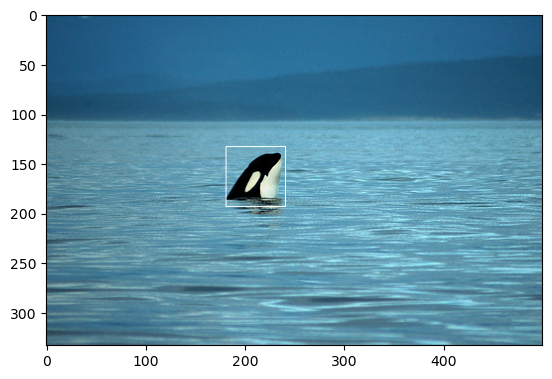

In [2]:
# Load the image
image = Image.open("whale.jpg")
# Draw bounding box
draw = ImageDraw.Draw(image)
draw.rectangle(((181, 133), (241, 193)), fill=None)
plt.imshow(image)

Can you crop the whale image given its bounding box?

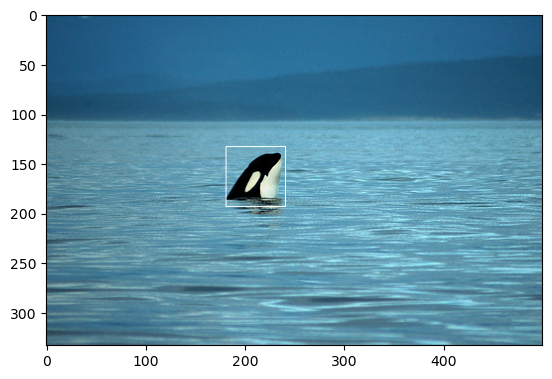

In [3]:
def crop(data, xmin, ymin, xmax, ymax):
    """
    doc-string
    """
    # Write your solution here
    return data


# Convert image to a n-dimensional array
data = np.array(image)
# Crop the image
orca = crop(data, 181, 133, 241, 193)
# View the result
plt.imshow(orca)

### Exercise 1B: Grayscale (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

Can you convert one or more images to grayscale?
Image to convert:

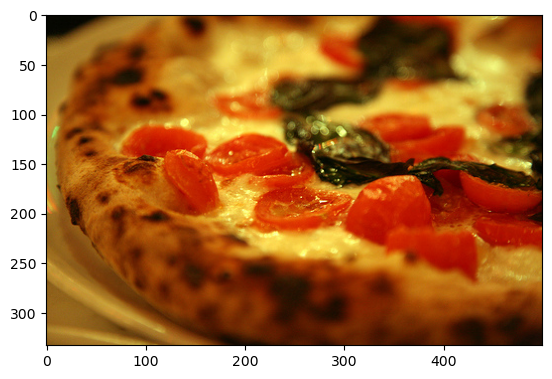

In [4]:
image = Image.open("pizza.jpg")
data = np.array(image)
plt.imshow(data)

Let's look at the data of the image and the data shape (as a `numpy` array):

In [ ]:
data.shape

The data is organised is three 2-dimensional arrays, representing three colors: red (0), green (1) and blue (2). For example, every value in `data[:, :, 0]` is an integer value between 0 and 255 representing how red is each image pixel.


We can derive a grayscale version of an image with the following formula:

$Y = 0.2126R + 0.7152G + 0.0722B$

where $Y$ is the grayscale pixel value based on the red ($R$), green ($G$) and blue ($B$) pixel values.

Use the grayscale formulae to solve this exercise.

In [ ]:
def grayscale(data):
    """
    doc-string
    """
    # Write your solution here
    return data


# Convert image to grayscale
grayscale = grayscale(data)

When plotting the result, use a `matplotlib` colormap that corresponds to the color we wish to see (in our case, `gray`).

In [ ]:
plt.imshow(grayscale, cmap='gray')




### Exrcice 1C: Normalise an image (<i class="fa fa-coffee"></i>)

Can you normalise all pixel values of an image in the range between $0$ and $1$ ?

In [5]:
def normalise(data):
    """
    doc-string
    """
    # Write your solution here
    return data

# Normalise image pixel values to be in [0, 1]
normalised = normalise(data)






## Exercise 2: Softmax (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

Can you compute the softmax function for an array?

Given an 1-D array with $n$ values $x_{1}, x_{2}, \dots, x_{n}$, the softmax function produces $y_{1}, y_{2}, \dots, y_{n}$, where all $y$ values are between 0 and 1 and they sum up to 1:

$y_{i} = \frac{\exp(x_{i})}{\sum_{j=1}^{n} \exp(x_{j})}$

In [6]:
def softmax(data):
    """
    doc-string
    """
    #Write your solution here
    return data


data = np.array([1, 1, 1, 1])
result = softmax(data)
print("Pass" if np.array_equal(result, np.array([0.25, 0.25, 0.25, 0.25])) else "Fail")

Fail


__TIP1.__ Use the [numpy.exp()](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) and [numpy.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) functions.

__TIP2.__ If `data` is a 2-dimensional array, perform softmax per row.



## Exercise 3: Inference

You are given the _weights_ of two simple, fully-connected neural networks: one is trained to classify 10 hand-written digits (from 0 to 9), and the other to classify 10 fashion items, e.g. t-shirts, trousers, coats, and so on. 

Your task is to test how well the pre-trained models can classify images in a corresponding dataset.

You are provided with two datasets. The [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 10,000 $28 \times 28$ grayscale images from 10 fashion categories. The category labels are:

  | Label | Description |
  |:-----:|:------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |



Similarly, the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 10,000 $28 \times 28$ grayscale images of 10 hand-written digits. Labels are self-explanatory (that is, label 0 corresponds to digit 0, 1 to 1, and so on). __You can choose to work with either dataset, or both. After all, the solution and analysis is the same in both cases.__



Below is function that loads either dataset in memory as a NumPy array:

In [12]:
import os

def load(directory):
    
    labelsfile = os.path.join(directory, 't10k-labels-fashion-idx1-ubyte.gz')
    imagesfile = os.path.join(directory, 't10k-images-fashion-idx3-ubyte.gz')
    
    # Load labels
    with gzip.open(labelsfile, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    
    # Load images
    with gzip.open(imagesfile, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(len(labels), 28, 28)
    
    return images, labels

For example:

In [15]:
images, labels = load(#write your directory path here)

plt.imshow(images[0], cmap='gray')
print('The (true) label of the image is', labels[0])  # An ankle boot; see table above

SyntaxError: unterminated string literal (detected at line 1) (1326843268.py, line 1)

### Exercise 3A:Classify one (<i class="fa fa-coffee"></i>)

Given an image from a dataset, can you predict the image's label? You can predict the label $y$ of an image ${X}$, given parameters $w$ and $b$, as follows:

$y = \arg\max(\mathrm{softmax} (X w + b))$

Iterate over all the images and compute their prediction accuracy.

#### Assumptions & Notes

1. Image pixel values should be normalised between 0 and 1.
2. Parameter $w$ has shape `(784, 10)`. Why 784? Because 28 $\times$ 28 equals 784. 
   See __Appendix A__ at the end of this notebook for an interpretation of weights.
3. Parameter $b$ has shape `(10,)`.

In [ ]:
def predictone(image, weights, bias):
    """
    doc-string
    """
    #Write your solution here
    return 


# Load parameters as a numpy array
w = np.load('fashion_weights.npy')
b = np.load('fashion_bias.npy')

# Iterate over all images and compute prediction accuracy
# Write your solution here
X = images[0]
y = predictone(X, w, b)



# Compute accuracy (as a percentage)
# Write your solution here

print(f'Predict label is {y}. Actual label is {labels[0]}')

### Exercise 3B:Classify many (<i class="fa fa-coffee"></i>)

Can you classify $N > 1$ images from the dataset?

In [ ]:
def predictmany(images, weights, bias):
    """
    doc-string
    """
    # Write your solution here
    return 


# Compute accuracy
# Write your solution here

# Load parameters as a numpy array
w = np.load('fashion_weights.npy')
b = np.load('fashion_bias.npy')

y = predictmany(images, w, b)

### Exrcise 3C: Analysis

What is the overall accuracy of the model (i.e., for all 10,000 images in the dataset)? (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

_You should expect a 92.6% and 84.7% accuracy for the MNIST and Fashion-MNIST dataset, respectively._

What is the accuracy per category? (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)






### Appendix A: Food-for-thought
### Interpretation of weights

Parameter $w$ has shape `(768, 10)`. 


You can interpret it as follows:
$w[:, 0]$ are the weights for category 0, $w[:, 1]$ the weights for category 1, and so on. Each of the 768 weights denote how important is each of the 768 pixel values of an image (also known as input features) for a particular category. 

In other words, parameters $w$ amplify the characteristic features of a category. Let's see this with an example, the trained weights to identify the hand-written digit 0.

In [ ]:
# Load the weights 
w = np.load('mnist_weights.npy')

# What are the charecteristics of the digit 0?
a = w[:,0].reshape([28, 28])

# Normalise them to be between 0 and 1 (for presentation purposes only)
b = (a - np.min(a))/np.ptp(a)

fg, ax = plt.subplots()
plot = ax.imshow(b, cmap='gray')
fg.colorbar(plot, ax=ax)